In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
# Load dataset
data= pd.read_csv('/content/drive/MyDrive/Lab_based/adult (1).csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


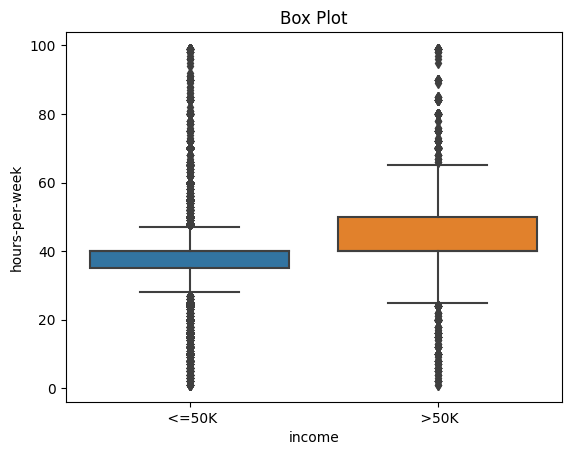

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Box plot
sns.boxplot(x='income', y='hours-per-week', data=data)
plt.title('Box Plot')
plt.show()

In [7]:
# filling missing data
column_names=data.columns
for a in column_names:
    data[a]=data[a].replace('?', np.NaN)

data= data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [9]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [10]:
data['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

<ipython-input-12-6edde3ecf888>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


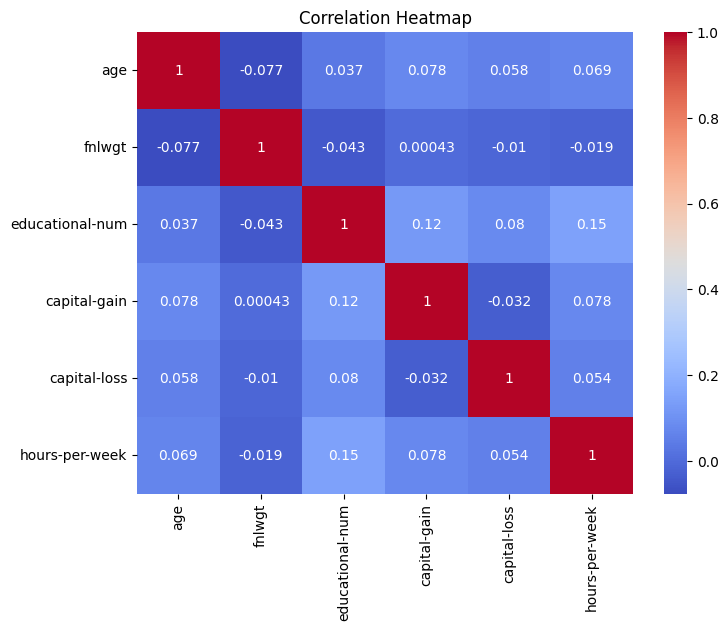

In [12]:
# Heatmap
correlation_matrix = data.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
data.replace([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], [' not married', ' married', ' divorced',
       ' married', ' not married', ' married',
       ' not married'])

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,not married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,married,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,not married,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,not married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#  Label Encoder
category_column= ['workclass', 'race', 'education','marital-status', 'occupation','relationship', 'gender', 'native-country', 'income']
labelEncoder= preprocessing.LabelEncoder()

# creating a map of all the numerical values of each categorical labels.

mapping_dict={}
for col in category_column:
    data[col]=labelEncoder.fit_transform(data[col])
    le_name_mapping=dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
print(mapping_dict)



In [15]:
from sklearn.metrics import accuracy_score
X= data.values[:,0:12]
Y=data.values[:,12]

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, Y,test_size =0.4, random_state = 40)

##Desision Tree Classifiers

In [17]:
#Fitting Decision Tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:
#Predicting the test set result
y_pred= classifier.predict(X_test)
# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

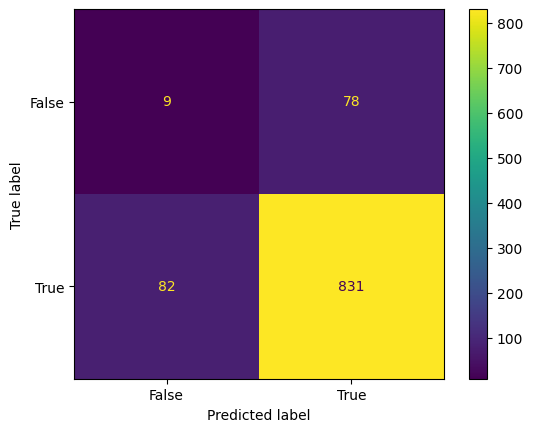

In [19]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
X_test = np.random.binomial(1, 0.9, size = 1000)
y_pred = np.random.binomial(1, 0.9, size = 1000)
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, accuracy_score
# Calculating the mean squared error (MSE)
mean_squared_error = mean_squared_error(X_test, y_pred)

# Calculating the root mean squared error (RMSE)
root_mean_squared_error = np.sqrt(mean_squared_error)

# Calculating the accuracy of the model
accuracy = accuracy_score(X_test, y_pred)

print("Mean Squared Error:", mean_squared_error)
print("Root Mean Squared Error:", root_mean_squared_error)
print("Accuracy:", accuracy*100)

Mean Squared Error: 0.202
Root Mean Squared Error: 0.44944410108488464
Accuracy: 79.80000000000001


##Random Forest Algorithims

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
# Create a random forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=100)  ##consist of 100 decision tree

In [22]:
# Fit the model to the training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=100)

In [23]:
from sklearn import metrics

print('Mean absolute error:', metrics.mean_absolute_error(X_test,y_pred ))
print('Mean square error :', metrics.mean_squared_error(X_test,y_pred))
print('Root Mean square error:', np.sqrt(metrics.mean_squared_error(X_test,y_pred)))
print("Accuracy:", accuracy*100)

Mean absolute error: 0.202
Mean square error : 0.202
Root Mean square error: 0.44944410108488464
Accuracy: 79.80000000000001


In [24]:
from sklearn.svm import SVC
# Creating an instance of the SVM classifier
svm_model = SVC()
# Training the model
svm_model.fit(X_train, y_train)


SVC()

In [25]:
# Calculating the mean squared error (MSE)
mse = mean_squared_error(X_test, y_pred)

# Calculating the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("Accuracy:", accuracy*100)
print("Mean Squared Error:", mse*100)
print("Root Mean Squared Error:", rmse*100)

Accuracy: 79.80000000000001
Mean Squared Error: 20.200000000000003
Root Mean Squared Error: 44.94441010848846
